# Basic Replication with MNIST
*This code is modified from: https://github.com/google/svcca/blob/master/tutorials/001_Introduction.ipynb*

In [3]:
import os, sys
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas
import gzip

sys.path.append("svcca")
import cca_core

# Load up second hidden layer of MNIST networks and compare
with open("svcca/tutorials/model_activations/MNIST/model_0_lay02.p", "rb") as f:
    acts1 = pickle.load(f)
with open("svcca/tutorials/model_activations/MNIST/model_1_lay02.p", "rb") as f:
    acts2 = pickle.load(f)
    
print("activation shapes", acts1.shape, acts2.shape)

results = cca_core.get_cca_similarity(acts1, acts2, epsilon=1e-10, verbose=False)
    

activation shapes (500, 10000) (500, 10000)


Below we see the highest correlated neurons and the lowest. We want the top left corner of coefficients.

Single number for summarizing similarity
0.4068


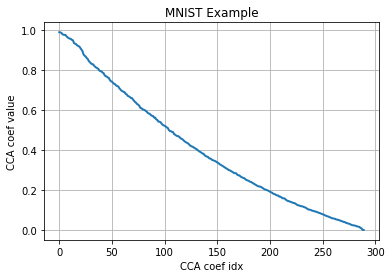

In [5]:
plt.plot(results["cca_coef1"], lw=2.0)
plt.xlabel("CCA coef idx")
plt.ylabel("CCA coef value")
plt.title("MNIST Example")


print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results["cca_coef1"])))
plt.grid()

Below we will generate a baseline based off of random data, the expectation is that these fake activations will show no correlation and average similiarity to be very low. 

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!
Single number for summarizing similarity
0.2097


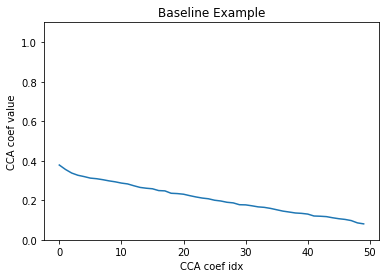

In [12]:
# assume X_fake has 100 neurons and we have their activations on 1000 datapoints
A_fake = np.random.randn(100, 2000)
# Y_fake has 50 neurons with activations on the same 1000 datapoints
B_fake = np.random.randn(50, 2000)

results = cca_core.get_cca_similarity(A_fake, B_fake, verbose=True)


plt.plot(results["cca_coef1"])
plt.ylim((0,1.1))
plt.xlabel("CCA coef idx")
plt.ylabel("CCA coef value")
plt.title("Baseline Example")

print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results["cca_coef1"])))

Now lets look at the correlation between A and its transpose, which is expected to be constant.

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!
Single number for summarizing similarity
1.0000


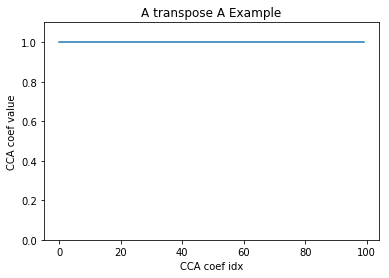

In [13]:
At_fake = np.dot(np.random.randn(100, 100), A_fake)
results_t = cca_core.get_cca_similarity(A_fake, At_fake)
plt.plot(results_t["cca_coef1"])
plt.ylim((0,1.1))
plt.xlabel("CCA coef idx")
plt.ylabel("CCA coef value")
plt.title("A transpose A Example")

print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results_t["cca_coef1"])))

Back to the main example of MNIST. We next want to look at the singular values to observe the variance of directions.

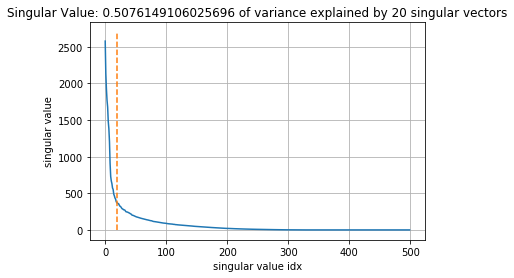

In [16]:
_, s, v = np.linalg.svd(acts1 - np.mean(acts1, axis=1, keepdims=True), full_matrices=False)  # Perform SVD
plt.plot(s)
plt.xlabel("singular value idx")
plt.ylabel("singular value")
plt.title("Singular Value: {} of variance explained by 20 singular vectors".format( np.sum(s[:20])/np.sum(s)))

plt.plot([20]*100, np.linspace(0, 2700, 100), linestyle="--")
plt.grid()

## SVCCA
Results using SVCCA Keeping 20 dimensions

Baseline 0.03808829341999629 and MNIST 0.7362758928888703


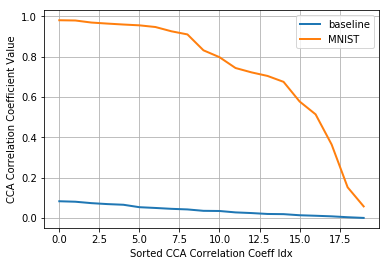

In [18]:
# creating a random baseline
b1 = np.random.randn(*acts1.shape)
b2 = np.random.randn(*acts2.shape)

# Mean subtract activations
cacts1 = acts1 - np.mean(acts1, axis=0, keepdims=True)
cacts2 = acts2 - np.mean(acts2, axis=0, keepdims=True)

# Perform SVD
U1, s1, V1 = np.linalg.svd(cacts1, full_matrices=False)
U2, s2, V2 = np.linalg.svd(cacts2, full_matrices=False)

svacts1 = np.dot(s1[:20]*np.eye(20), V1[:20])
# can also compute as svacts1 = np.dot(U1.T[:20], cacts1)
svacts2 = np.dot(s2[:20]*np.eye(20), V2[:20])
# can also compute as svacts1 = np.dot(U2.T[:20], cacts2)

svcca_results = cca_core.get_cca_similarity(svacts1, svacts2, epsilon=1e-10, verbose=False)

# Mean subtract baseline activations
cb1 = b1 - np.mean(b1, axis=0, keepdims=True)
cb2 = b2 - np.mean(b2, axis=0, keepdims=True)

# Perform SVD
Ub1, sb1, Vb1 = np.linalg.svd(cb1, full_matrices=False)
Ub2, sb2, Vb2 = np.linalg.svd(cb2, full_matrices=False)

svb1 = np.dot(sb1[:20]*np.eye(20), Vb1[:20])
svb2 = np.dot(sb2[:20]*np.eye(20), Vb2[:20])

svcca_baseline = cca_core.get_cca_similarity(svb1, svb2, epsilon=1e-10, verbose=False)
print("Baseline", np.mean(svcca_baseline["cca_coef1"]), "and MNIST", np.mean(svcca_results["cca_coef1"]))

plt.plot(svcca_baseline["cca_coef1"], lw=2.0, label="baseline")
plt.plot(svcca_results["cca_coef1"], lw=2.0, label="MNIST")
plt.xlabel("Sorted CCA Correlation Coeff Idx")
plt.ylabel("CCA Correlation Coefficient Value")
plt.legend(loc="best")
plt.grid()
